<a href="https://colab.research.google.com/github/lucifernob/Exploratory-Data-Analysis-of-Car-Features/blob/master/Project_car_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Exploratory Data Analysis of Car Features**

---


# **1. Importing libraries**

Importing all the libraries which we will be required for the project.

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns                     #used for visualisation
import matplotlib.pyplot as plt           #used for visualisation
%matplotlib inline

**1.1 Load data file**

The data file is in .csv format and for importing there are 3 main methods: 
- From local drive
- From URL
- From google drive


> *Note: Using "import from local drive" may require you to load data file every time you run the code, so import from google drive is better option.*



In [12]:
#Import data file from your google drive
#from google.colab import drive
#drive.mount("/content/gdrive")

#import pandas as pd
#pd.read_csv('/content/gdrive/My Drive/Internship studio/Project/data.csv')                   #Copy the file path and replace with the given path

In [13]:
#Import data file for local drive
from google.colab import files           
uploaded=files.upload()                      #it will create upload option to load your desired file form your local drive


Saving data.csv to data.csv


**1.2 Loading the data into the data**

Load the required data file for data analysis, and check whether data is loaded properly.

In [14]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))                            #Reading the file "data.cv"

In [15]:
#To display the top 5 rows
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [16]:
#To display the bottom 5 rows
df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


**1.3 Checking the types of data and basic summary stats**

Sometimes the data is not in correct format, like integer data is stored as string so we need to convert it, hence we check data type here.


> Note: Don't procede furthere before checking data type.







In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8546 entries, 0 to 11913
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           8546 non-null   object 
 1   Model          8546 non-null   object 
 2   Year           8546 non-null   int64  
 3   HP             8546 non-null   float64
 4   Cylinders      8546 non-null   float64
 5   Transmission   8546 non-null   object 
 6   Drive Mode     8546 non-null   object 
 7   Vehicle Size   8546 non-null   object 
 8   Vehicle Style  8546 non-null   object 
 9   MPG-H          8546 non-null   int64  
 10  MPG-C          8546 non-null   int64  
 11  Popularity     8546 non-null   int64  
 12  Price          8546 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 934.7+ KB


In [18]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


# **2. Dropping irrelevant data**

When we import data, sometimes irrlevant data is also there, so we will drop that column or row which is less relvant for us.


> Dropping of irrelvant data can have multiple rows of same data, some missing values, so as per our need we can remove them or imput the new values, remember: More data we provide, More accurate result we will get. 



In [19]:
df=df.drop(['Number of Doors','Market Category','Engine Fuel Type'], axis=1) #axis is basically row, here from row ! drop the labelled column.
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


#**3. Renaming the columns**
Renaming the columns for the better understanding of data.

In [20]:
df=df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"})
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


#**4. Dropping duplicate rows**

There is a chance of duplicate data or null values in large dataset so to removing them is better idea.

> *Note: We are only dropping duplicate values not null values here.*




In [21]:
df.shape             # size of data

(11914, 13)

In [22]:
duplicate_rows_df=df[df.duplicated()]                             #Finding duplicate rows
print("No. of duplicate rows= ", duplicate_rows_df.shape)         #Print how many rows with duplicate data are present.

No. of duplicate rows=  (792, 13)


In [23]:
df=df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [24]:
df.shape          #So we are left with less rows after removing suplicate rows.

(11122, 13)

**4.1 Dropping the missing or null values**

Similar to previous there is a chance of null values in large dataset so to removing them is better idea, the data set contain very few null values so we can remove them instead of adding.

> *NOTE: Instead of removing the the null values we can also impute the values which are missing, this approach is better than dropping as more data give more accurate result.*
> If we need to impute we imput with the medan values of that column and not mean it is more robust to outline.





In [25]:
print (df.isnull().sum())   #Printing the data with null vaues.

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64


In [26]:
df=df.dropna()          #Dropping the null values
df.count()

Make             11024
Model            11024
Year             11024
HP               11024
Cylinders        11024
Transmission     11024
Drive Mode       11024
Vehicle Size     11024
Vehicle Style    11024
MPG-H            11024
MPG-C            11024
Popularity       11024
Price            11024
dtype: int64

In [27]:
print(df.isnull().sum())      

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64


#**5. Detecting outliers**



> We will use box and whisker plot to plot outliers



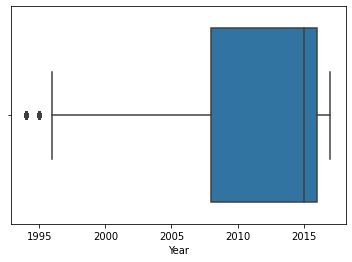

In [60]:
sns.boxplot(x=df['Year']);

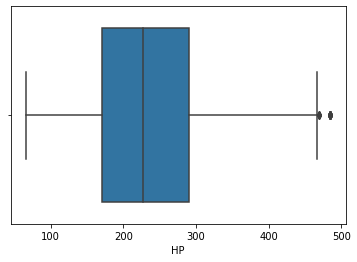

In [59]:
sns.boxplot(x=df['HP']);

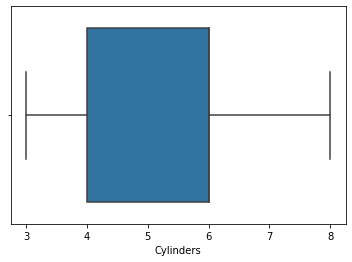

In [58]:
sns.boxplot(x=df['Cylinders']);

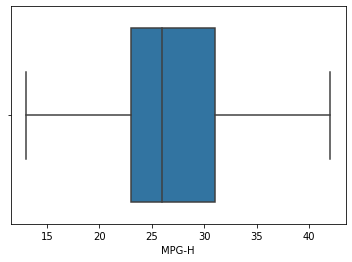

In [57]:
sns.boxplot(x=df['MPG-H']);

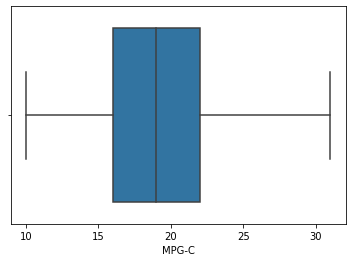

In [56]:
sns.boxplot(x=df['MPG-C']);

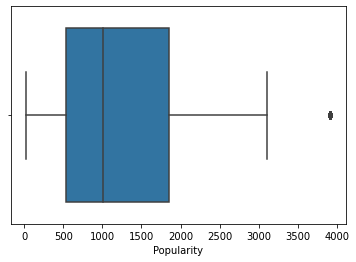

In [55]:
sns.boxplot(x=df['Popularity']);

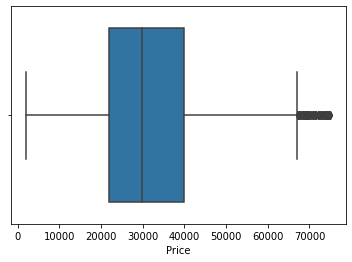

In [54]:
sns.boxplot(x=df['Price']);

In [35]:
Q1=df.quantile(0.25)    #Whisker 1
Q3=df.quantile(0.75)    #whisker 2
IQR=Q3-Q1               #interquartile range here
print(IQR)

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21426.25
dtype: float64


In [36]:
df=df[~((df<(Q1-1.5*IQR))| (df>(Q3+1.5*IQR))).any(axis=1)]      #Standard formula but we can also use mean to 
df.shape

(8546, 13)

#**6. Most represented car brands**

In this section we will find top 10 car brands and calculate there average price of the car in that car brand.

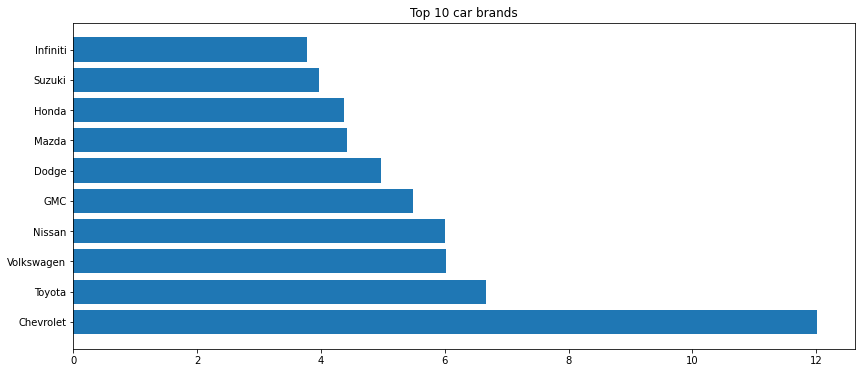

In [37]:
#Percentage of car brand
counts=df['Make'].value_counts()*100/sum(df['Make'].value_counts())

#Top 10car brands
popular_labels=counts.index[:10]

#Plot
plt.figure(figsize=(14,6))
plt.barh(popular_labels,width=counts[:10])
plt.title('Top 10 car brands')
plt.show()

In [53]:
prices=df[['Make','Price']].loc[(df['Make']==  'Chevrolet') |
                               (df['Make']=='Ford') |
                               (df['Make']=='Volkswagen') |
                               (df['Make']=='Toyota') |
                               (df['Make']=='Dodge') |
                               (df['Make']=='Nissan') |
                               (df['Make']=='GMC') |
                               (df['Make']=='Honda') |
                               (df['Make']=='Mazda')].groupby('Make').mean()
print(prices)

                   Price
Make                    
Chevrolet   28142.855891
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20495.820106
Nissan      28352.543860
Toyota      27769.421793
Volkswagen  29032.817476


#**7. Correlation matrix** 

In [39]:
df.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.325104,-0.106597,0.373319,0.335236,0.200710,0.591439
HP,0.325104,1.000000,0.734094,-0.453451,-0.554768,0.095161,0.745852
Cylinders,-0.106597,0.734094,1.000000,-0.691395,-0.746361,0.013373,0.389049
MPG-H,0.373319,-0.453451,-0.691395,1.000000,0.936978,0.093002,-0.121262
MPG-C,0.335236,-0.554768,-0.746361,0.936978,1.000000,0.081110,-0.197330
Popularity,0.200710,0.095161,0.013373,0.093002,0.081110,1.000000,0.113604
Price,0.591439,0.745852,0.389049,-0.121262,-0.197330,0.113604,1.000000


**Correlation & Anticorrelation**

From the above anlysis we obseve there is 


1.   High correlation between 

      *   Cylinders and HP
      *   Highway mpg and City mpg
      *   Hp and price



More the the cylinders present in car more will the horse power i.e. more power.

2.   Hight Anticorrelation between

      *   Cylinders and highway mpg

More the cylinders present more is the power which results in more fuel consumption hence less mileage.*italicized text*








**Heat Map**

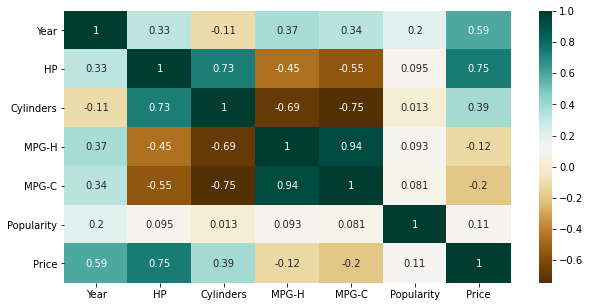

In [51]:
plt.figure(figsize=(10,5))
c=df.corr()
sns.heatmap(c,cmap="BrBG", annot=True);

**Scatterplot**
Scatter plot is used to find the correlation between two variables. As from the previous result we see strong correlation between Hp and price too, so we plot the graph for them and then drwa the trend line.

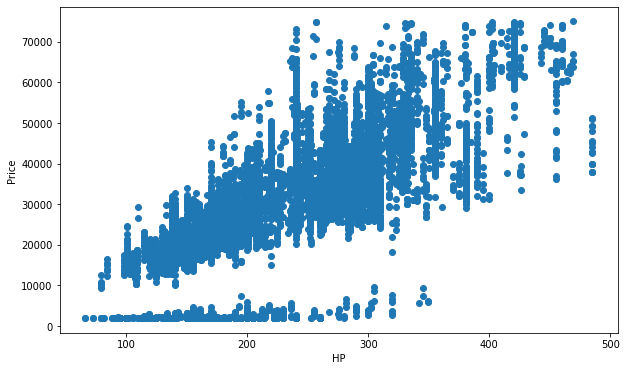

In [50]:
#scatterplot between HP & Price

fig, ax=plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

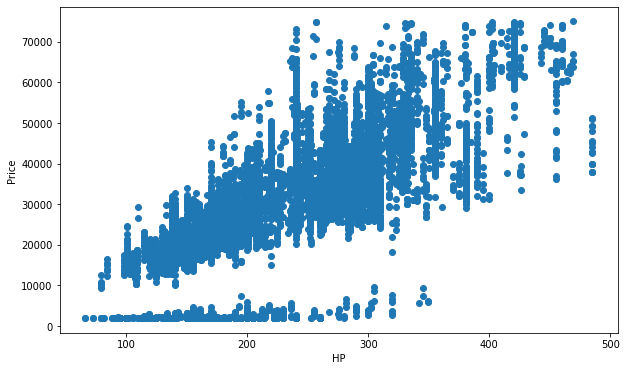

In [49]:
#scatterplot between HP & Cylinders
fig, ax=plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

**Vehicle style segment of card that sold most**

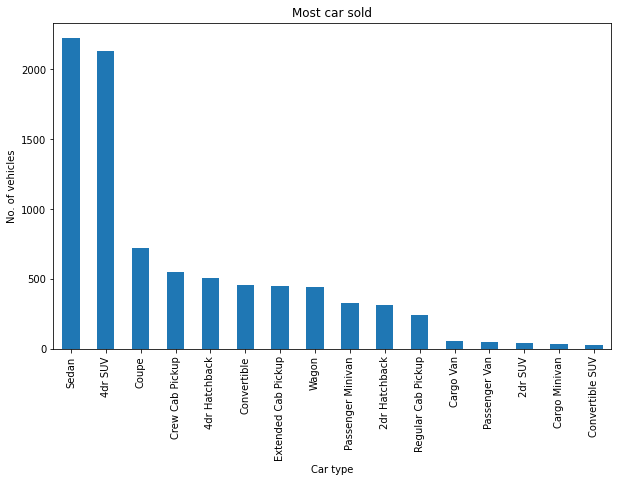

In [48]:
#Bar chart for car "Body" variable
df["Vehicle Style"].value_counts().plot.bar(figsize=(10,6))
plt.title("Most car sold")
plt.xlabel("Car type")
plt.ylabel("No. of vehicles");

From the chart we can see **Sedan** cars were the most sold cards followed by 4dr SUV.

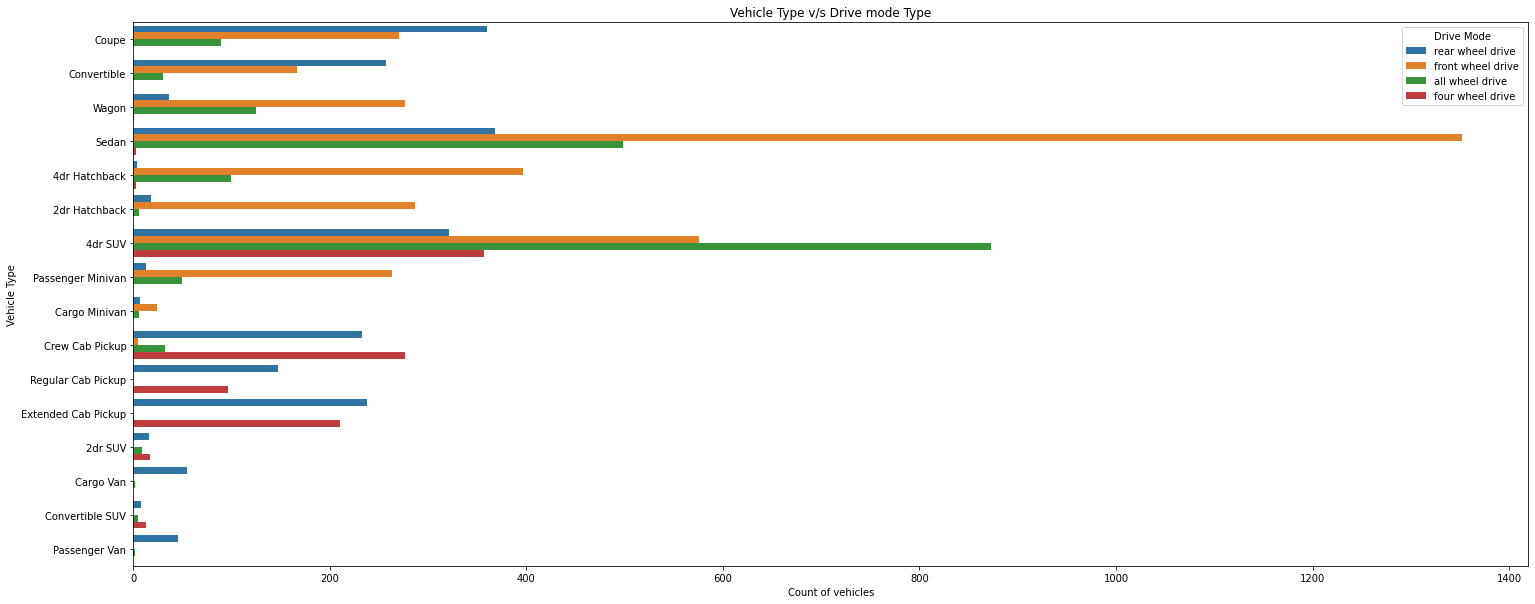

In [92]:
#Vehicle style type and Drive type analysis
plt.figure(figsize=(25,10))
sns.countplot(y="Vehicle Style", data=df, hue="Drive Mode")
plt.title("Vehicle Type v/s Drive mode Type")
plt.ylabel("Vehicle Type")
plt.xlabel("Count of vehicles")
plt.show()

**Making a New group "price_group"**

In [95]:
#Create a new group "price_group" and assign the value based on the car price
df["price_group"]=pd.cut(df["Price"],[0,20000,40000,60000,80000,100000,600000],
                          labels=["<20K","20-39K","40-59K","60-79K","80-99K",">100k"], include_lowest=True)
df["price_group"]=df["price_group"].astype(object)

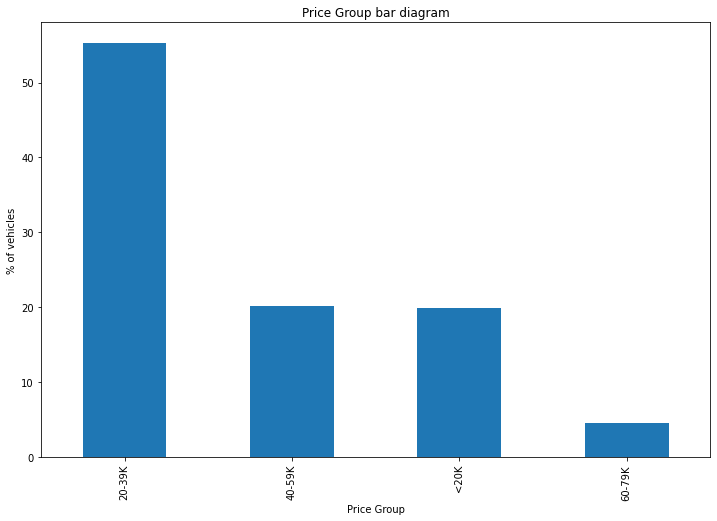

In [99]:
(df["price_group"].value_counts()/len(df)*100).plot.bar(figsize=(12,8))
plt.title("Price Group bar diagram")
plt.ylabel("% of vehicles")
plt.xlabel("Price Group");